# Self Driving Car with Udacity environment
![](http://self-drivings.com/wp-content/uploads/2017/01/bosch-self-driving-car.jpg)
## Preprocessing

In [1]:
# Usual
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import time
from tqdm import tqdm

# Autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

##### References : 
- The excellent tutorials at https://pythonprogramming.net/open-cv-basics-python-plays-gta-v/
- Medium artilce https://medium.com/@galen.ballew/opencv-lanedetection-419361364fc0

# Loading images

In [2]:
import glob

In [3]:
images = glob.glob("images/*.PNG")

In [4]:
from PIL import Image

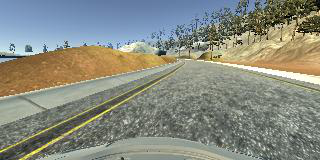

In [5]:
img = Image.open(images[0])
img_array = np.array(img)
img

# Preprocessing the images

In [6]:
import cv2

## Basic  preprocessing

### Put to black and white

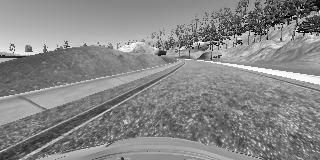

In [23]:
def to_black_and_white(img):
    return cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_baw = to_black_and_white(img_array)
Image.fromarray(img_baw)

### Detect edges

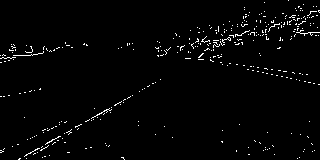

In [265]:
def detect_edges(img,threshold1 = 200,threshold2 = 300):
    return cv2.Canny(img, threshold1 = threshold1, threshold2=threshold2)

img_edges = detect_edges(img_baw,500,500)
Image.fromarray(img_edges)

### Smooth with a gaussian distribution

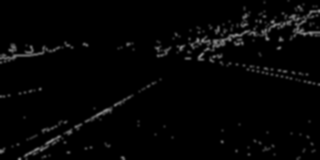

In [266]:
def gaussian_smooth(img):
    return cv2.GaussianBlur(img,(5,5),0)

img_smoothed = gaussian_smooth(img_edges)
Image.fromarray(img_smoothed)

## Detect lanes

### Filter out the top of the image

In [209]:
img_edges.shape

(160, 320)

In [210]:
vertices = [[0,160],[0,60],[320,60],[320,160]]

In [267]:
def select_part_from_mask(img,vertices):
    vertices = np.array([vertices],dtype = np.int32)
    
    mask = np.zeros_like(img)
    
    # fill the mask
    cv2.fillPoly(mask, vertices, 255)
    
    # now only show the area that is the mask
    masked = cv2.bitwise_and(img, mask)
    return masked

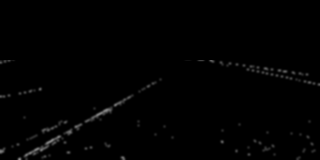

In [268]:
img_edges_filtered = select_part_from_mask(img_smoothed,vertices)
Image.fromarray(img_edges_filtered)

### Detect lanes via Hough Lines P algorithm
https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [269]:
def draw_lines(img,lines):
    img = np.copy(img)
    for line in lines:
        coords = line[0]
        cv2.line(img, (coords[0], coords[1]), (coords[2], coords[3]), [255,255,255], 2)
    return img

In [453]:
def detect_hough_lines(img,alpha = 100,min_length = 200,max_gap = 15):
    lines = cv2.HoughLinesP(img, 1, np.pi/180,alpha,np.array([]),min_length,max_gap)
    img = draw_lines(img,lines)
    return img

##### Before

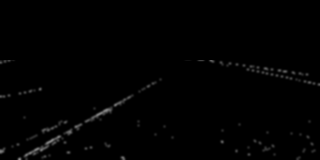

In [449]:
Image.fromarray(img_edges_filtered)

##### After

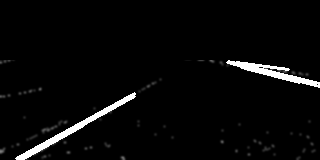

In [460]:
img_lanes = detect_hough_lines(img_edges_filtered,50,min_length=50,max_gap=1)
Image.fromarray(img_lanes)

## Preprocessing function

In [8]:
from preprocessing import CameraImage

##### Testing on other pictures

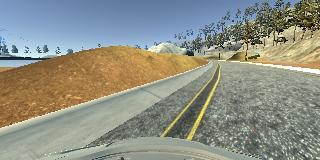

In [10]:
test_image_2 = Image.open(images[1])
test_image_2

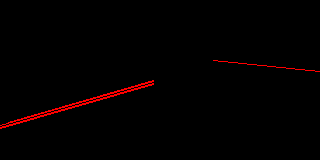

In [11]:
x2 = CameraImage(test_image_2)
l,r = x2.preprocess(threshold=50,min_length=100,main_lines = False)
x2

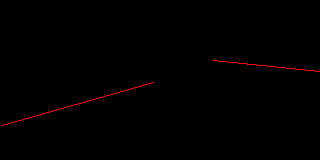

In [28]:
x2 = CameraImage(test_image_2)
l,r = x2.preprocess(threshold=50,min_length=100,main_lines = True)
x2

In [37]:
x2.act()

0.18247653583617751

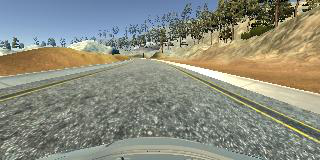

In [25]:
test_image_3 = Image.open(images[10])
test_image_3

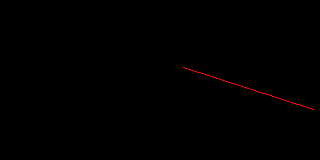

In [34]:
x3 = CameraImage(test_image_3)
l,r = x3.preprocess(min_length=100)
x3

In [36]:
x3.act()

-0.25